In [27]:
!pip install googletrans


In [28]:
!pip install pillow

In [29]:
!pip install gtts


In [30]:
!pip install ipython


In [31]:
!pip install easyocr


In [32]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-08-19 11:21:27--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.28.34, 104.16.0.35, 104.16.27.34, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.28.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg.3’

mk1jX.jpg.3         100%[===================>]  44.12K  --.-KB/s    in 0s      

2020-08-19 11:21:27 (89.3 MB/s) - ‘mk1jX.jpg.3’ saved [45178/45178]



In [33]:
from googletrans import Translator


In [34]:
from gtts import gTTS

In [82]:
import easyocr

In [83]:
from IPython.display import Audio

In [84]:
reader=easyocr.Reader(['ta'])
reader = easyocr.Reader(['ta','en'])
translator = Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


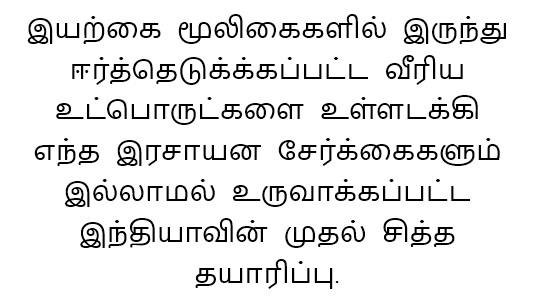

In [85]:
import PIL
from PIL import ImageDraw
i = PIL.Image.open("mk1jX.jpg.2")
i

In [86]:
#reader = easyocr.Reader(['ch_sim','en']) # need to run only once to load model into memory
#result = reader.readtext('mk1jX.jpg.2')

#bounds = reader.readtext('mk1jX.jpg.2', add_margin= 0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch', blocklist='=.'
#bounds

bounds = reader.readtext('mk1jX.jpg.2')
bounds

[([[50, 4], [514, 4], [514, 52], [50, 52]],
  'யற்கை மூலிகைகளில் இருந்து',
  0.061115264892578125),
 ([[67, 51], [471, 51], [471, 91], [67, 91]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.03585366904735565),
 ([[317, 91], [483, 91], [483, 127], [317, 127]],
  'உள்ளடக்கி',
  0.23006778955459595),
 ([[53, 93], [309, 93], [309, 131], [53, 131]],
  'உட்பொருட்களை',
  0.46229782700538635),
 ([[29, 133], [507, 133], [507, 173], [29, 173]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.11195868998765945),
 ([[229, 172], [475, 172], [475, 213], [229, 213]],
  'உருவாக்கப்பட்ட',
  0.3639814257621765),
 ([[87, 175], [221, 175], [221, 211], [87, 211]],
  'ல்லாமல்',
  0.1923225075006485),
 ([[76, 212], [273, 212], [273, 255], [76, 255]],
  'இந்தியாவின்',
  0.21061395108699799),
 ([[379, 215], [461, 215], [461, 253], [379, 253]],
  'சித்த',
  0.38612884283065796),
 ([[279.46153846153845, 220.30769230769232],
   [371.5777087639997, 213.21114561800016],
   [373.53846153846155, 251.69230769230768],
   [280.4222912360003

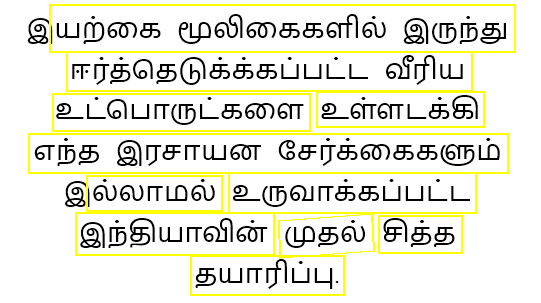

In [87]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(i, bounds)

In [90]:
#text_list = reader.readtext('mk1jX.jpg.2', add_margin= 0.55, width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist=':
#text_list
#reader.readtext('chinese.jpg', detail = 0)

text_list = reader.readtext('mk1jX.jpg.2',detail= 0)
text_list

['யற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உள்ளடக்கி',
 'உட்பொருட்களை',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'உருவாக்கப்பட்ட',
 'ல்லாமல்',
 'இந்தியாவின்',
 'சித்த',
 'முதல்',
 'தயாரிப்பு']

In [91]:
text_comb=' '.join(text_list)
text_comb

'யற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உள்ளடக்கி உட்பொருட்களை எந்த இரசாயன சேர்க்கைகளும் உருவாக்கப்பட்ட ல்லாமல் இந்தியாவின் சித்த முதல் தயாரிப்பு'

In [92]:
print(translator.detect(text_comb,src='ta'))


Detected(lang=ta, confidence=1.0)


In [94]:
text_en = translator.translate(text_comb, src ='ta')
print(text_en.text)

The active ingredient extracted from natural herbs is the first product of India's paranoia without any chemical additives.


In [96]:
ta_tts=gTTS(text_en.text)
ta_tts.save('trans.mp3')


In [97]:
Audio('trans.mp3',autoplay=True)

In [111]:
text_hi =translator.translate(text_comb,src='ta',dest='hi')
print(text_hi.text)

प्राकृतिक जड़ी बूटियों से निकाला गया सक्रिय संघटक भारत के किसी भी रासायनिक योजक के बिना व्यामोह का पहला उत्पाद है।


In [114]:
ta_tts_hi=gTTS(text_hi.text,lang='hi')
ta_tts_hi.save('trans_hi.mp3')

In [115]:
Audio('trans_hi.mp3',autoplay=True)

In [116]:
text_fr=translator.translate(text_comb,src='ta',dest='fr')
print(text_fr.text)

L'ingrédient actif extrait d'herbes naturelles est le premier produit de la paranoïa de l'Inde sans aucun additif chimique.


In [117]:
ta_tts_fr=gTTS(text_fr.text,lang='fr')
ta_tts_fr.save('trans_fr.mp3')

In [118]:
Audio('trans_fr.mp3',autoplay=True)